### Import the necessary libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### We will start with making a **dataframe** using the pandas so that we can mainupiltae the data easily 
***

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Now we will look at the ***basic information*** of the dataframe so that we can understand it more.
***

In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### In the below command/code we are checking that what is the total count of the ___"NULL"___ values in each column . 
***
##### As we can see that there are mostly 3 columns that have missing values now we can work on retifiying this issue 

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### In the foolowing we are doing three things:
> 1. We are filling the ___empty/missing___ value of ***'Age'*** using the mean of that column itself
> 2. Then for the ***'Cabin'*** i thought that removing the whole column will be the best cource of action as there is not enough data provided for to be filled.
> 3. Lastly we are filling the missing values in the ***'Embraked'*** coloumn with the most comman value that is in that column.
***

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.drop('Cabin' , axis=1)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18672\4081485939.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


### Now as the data has been cleaned now the next step is analysis and for that here we are converting ***sex*** into ___numeric form___ so that the analyisis can become easy.

In [10]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

### Now lets do some basic ***calculations*** on the data
***
>Firstly we will perform mean on ___'sex'___ and ___'survived'___ so that we can understand that which gender has more survival rate .

In [11]:
df.groupby('Sex')['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

>Here we are looking for ***survial rate for children*** i have taken the limit of ***15*** but you can take it according to you , but i thought that a child be one who is younger then 15

In [12]:
df.groupby(df['Age']<15)['Survived'].mean()

Age
False    0.365314
True     0.576923
Name: Survived, dtype: float64

* Now the next three might seems like what the hell i did but actually i was having a hard time understanding what the survival rate is for each ***'Pclass'*** that's why i divided it into three:
>1. Firstly i checked for the ***'Pclass1'***
>2. Then for ***'Pclass2'*** 
>3. And lastly for ***'Pclass3'***

*And we can clearly see that the people in ***'Pclass1'*** had the ___higher survival rate___ then the other two 

In [13]:
df.groupby(df['Pclass']==1)['Survived'].mean()  


Pclass
False    0.305185
True     0.629630
Name: Survived, dtype: float64

In [14]:
df.groupby(df['Pclass']==2)['Survived'].mean()

Pclass
False    0.360679
True     0.472826
Name: Survived, dtype: float64

In [15]:
df.groupby(df['Pclass']==3)['Survived'].mean()


Pclass
False    0.557500
True     0.242363
Name: Survived, dtype: float64

### From here we will ___visualize___ the data to better understand it 
***
> 1. Firstly we have a countplot made by using seaborn and labled with the help of matplotlib , in it we can see the ***sirvival rate*** accroading to the ***sex*** 

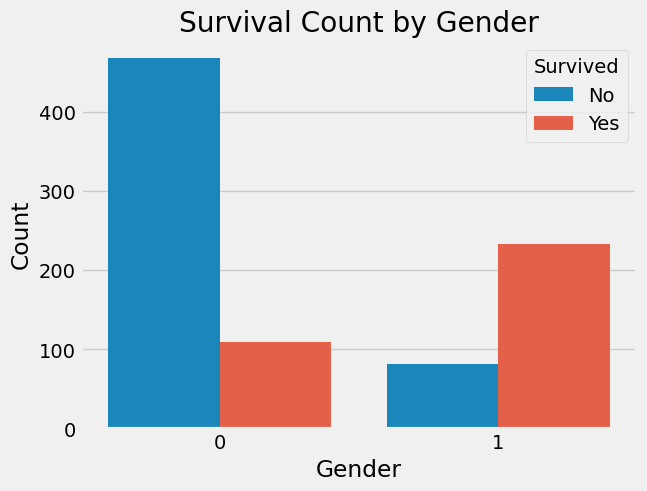

In [16]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


> 2. Then we used the barplot or we can say bar to see the ***survial rate*** according to the ***'Pclass'*** , as we can see it matches with our calculation that we did above and the ___'Pclass1' has the higest survival rate___. 

<Axes: xlabel='Pclass', ylabel='Survived'>

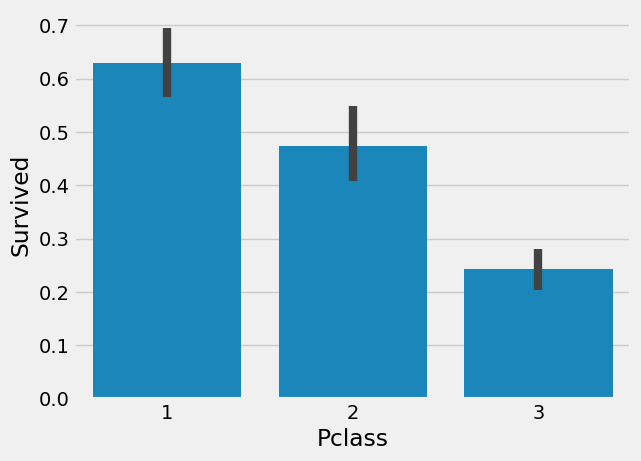

In [17]:

sns.barplot(data=df, x='Pclass', y='Survived')

> 3. Then what we did next is that we made a histogram to see the ***survival rate*** according to the ***'Age'*** 

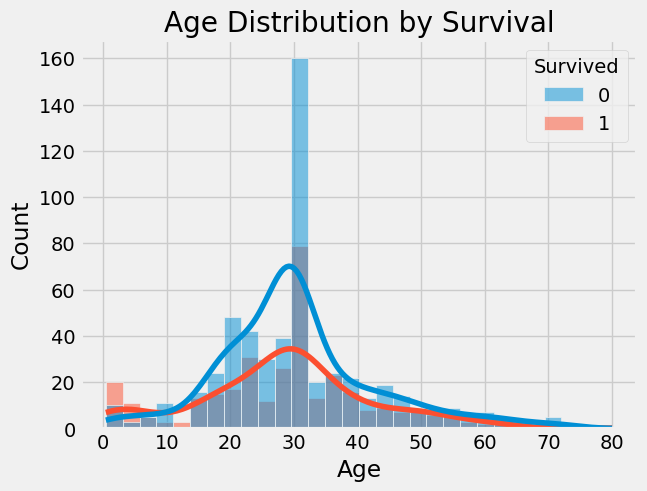

In [18]:
sns.histplot(data=df, x='Age', bins=30, hue='Survived', kde=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


>4. And lastly to check if there is any ***relation of the family size*** with ***survival rate*** we made bar diagram and as we can see the family size of 3 had the higher survival then others 

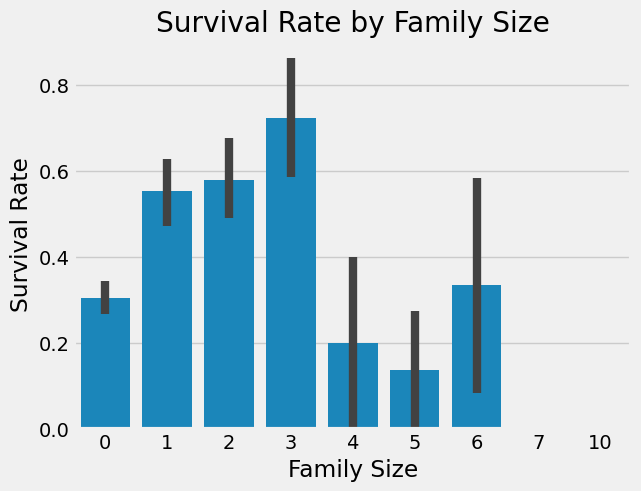

In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()
